In [1]:
from math import log, log2

MAX_ITER = 100

def mandelbrot(c):
    z = 0
    n = 0
    while abs(z) <= 2 and n < MAX_ITER:
        z = z*z + c
        n += 1

    if n == MAX_ITER:
        return MAX_ITER
    
    return n + 1 - log(log2(abs(z)))

In [2]:
from PIL import Image, ImageDraw
# from mandelbrot import mandelbrot, MAX_ITER

# Image size (pixels)
WIDTH = 1024
HEIGHT = 720

# Plot window
RE_START = -2
RE_END = 1
IM_START = -1
IM_END = 1

im = Image.new('HSV', (WIDTH, HEIGHT), (0, 0, 0))
draw = ImageDraw.Draw(im)

for x in range(0, WIDTH):
    for y in range(0, HEIGHT):
        # Convert pixel coordinate to complex number
        c = complex(RE_START + (x / WIDTH) * (RE_END - RE_START),
                    IM_START + (y / HEIGHT) * (IM_END - IM_START))
        # Compute the number of iterations
        m = mandelbrot(c)
        # The color depends on the number of iterations
        hue = int(255 * m / MAX_ITER)
        saturation = 255
        value = 255 if m < MAX_ITER else 0
        # Plot the point
        draw.point([x, y], (hue, saturation, value))

im.convert('RGB').save('output.png', 'PNG')


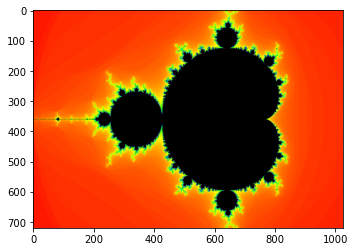

In [3]:
import matplotlib.pyplot as plt
plt.imshow(im)